In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
import pandas as pd
A=pd.read_csv("C:/Users/Suja4/OneDrive/Documents/Data Science/Dataset/hitters.csv")
A

,Name,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,Willie McGee,497,127,7,65,48,37,5,2703,806,...,379,311,138,N,E,325,9,3,700.0,N
318,Willie Randolph,492,136,5,76,50,94,12,5511,1511,...,897,451,875,A,E,313,381,20,875.0,A
319,Wayne Tolleson,475,126,3,61,43,52,6,1700,433,...,217,93,146,A,W,37,113,7,385.0,A
320,Willie Upshaw,573,144,9,85,60,78,8,3198,857,...,470,420,332,A,E,1314,131,12,960.0,A


In [3]:
A.head(3)

,Name,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A


In [4]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       322 non-null    object 
 1   AtBat      322 non-null    int64  
 2   Hits       322 non-null    int64  
 3   HmRun      322 non-null    int64  
 4   Runs       322 non-null    int64  
 5   RBI        322 non-null    int64  
 6   Walks      322 non-null    int64  
 7   Years      322 non-null    int64  
 8   CAtBat     322 non-null    int64  
 9   CHits      322 non-null    int64  
 10  CHmRun     322 non-null    int64  
 11  CRuns      322 non-null    int64  
 12  CRBI       322 non-null    int64  
 13  CWalks     322 non-null    int64  
 14  League     322 non-null    object 
 15  Division   322 non-null    object 
 16  PutOuts    322 non-null    int64  
 17  Assists    322 non-null    int64  
 18  Errors     322 non-null    int64  
 19  Salary     263 non-null    float64
 20  NewLeague 

In [5]:
A.shape

(322, 21)

# remove discrete values

In [6]:
A.nunique()

Name         322
AtBat        247
Hits         144
HmRun         36
Runs          96
RBI          103
Walks         89
Years         22
CAtBat       314
CHits        288
CHmRun       146
CRuns        261
CRBI         262
CWalks       248
League         2
Division       2
PutOuts      232
Assists      161
Errors        29
Salary       150
NewLeague      2
dtype: int64

In [7]:
A=A.drop(labels=["Name"],axis=1)

In [8]:
A.isna().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

# missing data treatment--salary to be predicted too,so can we fill salary?

In [9]:
t=round(A.Salary.mean(),1)
t

535.9

In [10]:
A.Salary=A.Salary.fillna(t)

In [11]:
A.isna().sum()

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

# outliers

In [12]:
con=[]
for i in A.columns:
    if A[i].dtype!="object":
        con.append(i)
con

['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'Assists',
 'Errors',
 'Salary']

In [13]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [14]:
A1=pd.DataFrame(ss.fit_transform(A[con]),columns=con)

In [15]:
A1

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
0,-0.574071,-0.755130,-1.123591,-0.804734,-0.728308,-1.145172,-1.310194,-1.015121,-0.997117,-0.795183,-0.985636,-0.905069,-0.923478,0.560399,-0.540924,1.880899,-0.000052
1,-0.430437,-0.431732,-0.433579,-1.035649,-0.383827,0.011930,1.332925,0.344876,0.179704,-0.005697,-0.113299,0.252124,0.430391,1.224048,-0.467740,0.308192,-0.149711
2,0.640293,0.624699,0.831443,0.580752,0.917547,1.724442,-0.903560,-0.441561,-0.398759,-0.075357,-0.404078,-0.192719,0.010354,2.108915,-0.182323,0.937275,-0.137424
3,0.751283,0.861858,1.061447,0.542266,1.147201,-0.080638,0.722974,1.283860,1.312145,1.805477,1.406546,1.526538,0.351634,-0.317331,-0.701928,-0.792703,-0.088275
4,-0.391264,-0.302373,-0.088573,-0.458363,-0.230724,-0.404626,-1.106877,-0.970736,-0.943555,-0.667472,-0.931677,-0.853972,-0.852222,1.841314,-0.489695,-0.635432,-1.092147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,0.757812,0.560020,-0.433579,0.542266,-0.001070,-0.080638,-0.496927,0.023406,0.135325,-0.435270,0.060569,-0.057463,-0.458437,0.128670,-0.716565,-0.792703,0.403217
318,0.725167,0.754058,-0.663583,0.965609,0.075482,2.557555,0.926291,1.233441,1.214204,-0.353999,1.613389,0.363334,2.305557,0.085854,2.005873,1.880899,0.833273
319,0.614177,0.538460,-0.893587,0.388323,-0.192448,0.613623,-0.293610,-0.408811,-0.435487,-0.725522,-0.425062,-0.712704,-0.428435,-0.898917,0.044547,-0.163620,-0.370883
320,1.254003,0.926537,-0.203575,1.311981,0.458239,1.817010,0.113024,0.236714,0.213371,0.319386,0.333362,0.270158,0.269127,3.657430,0.176278,0.622733,1.042157


In [16]:
outliers=[]
for i in con :
    outliers.extend(A1[(A1[i]>3)|(A1[i]<-3)].index)
outliers
    
    

[136,
 248,
 313,
 236,
 302,
 236,
 302,
 236,
 302,
 73,
 80,
 114,
 121,
 163,
 249,
 302,
 236,
 249,
 249,
 302,
 306,
 30,
 73,
 236,
 249,
 292,
 32,
 82,
 113,
 179,
 180,
 189,
 235,
 272,
 274,
 278,
 310,
 315,
 320,
 260,
 276,
 82,
 84,
 96,
 100,
 112,
 163,
 179,
 217,
 229]

In [17]:
from numpy import unique


In [18]:
out=unique(outliers)

In [19]:
out

array([ 30,  32,  73,  80,  82,  84,  96, 100, 112, 113, 114, 121, 136,
       163, 179, 180, 189, 217, 229, 235, 236, 248, 249, 260, 272, 274,
       276, 278, 292, 302, 306, 310, 313, 315, 320])

In [20]:
A=A.drop(index=out,axis=0)

In [21]:
A.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 287 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      287 non-null    int64  
 1   Hits       287 non-null    int64  
 2   HmRun      287 non-null    int64  
 3   Runs       287 non-null    int64  
 4   RBI        287 non-null    int64  
 5   Walks      287 non-null    int64  
 6   Years      287 non-null    int64  
 7   CAtBat     287 non-null    int64  
 8   CHits      287 non-null    int64  
 9   CHmRun     287 non-null    int64  
 10  CRuns      287 non-null    int64  
 11  CRBI       287 non-null    int64  
 12  CWalks     287 non-null    int64  
 13  League     287 non-null    object 
 14  Division   287 non-null    object 
 15  PutOuts    287 non-null    int64  
 16  Assists    287 non-null    int64  
 17  Errors     287 non-null    int64  
 18  Salary     287 non-null    float64
 19  NewLeague  287 non-null    object 
dtypes: float64

In [22]:
A

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,535.9,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,221,53,2,21,23,22,8,1063,283,15,107,124,106,N,E,325,58,6,535.9,N
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A


In [23]:
A.index=range(0,287)

In [24]:
A

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,535.9,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,221,53,2,21,23,22,8,1063,283,15,107,124,106,N,E,325,58,6,535.9,N
283,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
284,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
285,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A


In [25]:
A.skew()

AtBat      0.039609
Hits       0.355584
HmRun      0.993031
Runs       0.448033
RBI        0.721144
Walks      0.621195
Years      0.662534
CAtBat     1.010601
CHits      1.080808
CHmRun     1.923868
CRuns      1.094107
CRBI       1.414339
CWalks     1.467142
PutOuts    1.675698
Assists    1.358910
Errors     0.983427
Salary     0.674684
dtype: float64

In [26]:
Y=A[["Salary"]]
X=A.drop(labels=["Salary"],axis=1)

In [27]:
X

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,221,53,2,21,23,22,8,1063,283,15,107,124,106,N,E,325,58,6,N
283,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,N
284,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,A
285,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,A


In [28]:
A.corr()["Salary"]

AtBat      0.326002
Hits       0.345971
HmRun      0.304035
Runs       0.307446
RBI        0.359890
Walks      0.339980
Years      0.460664
CAtBat     0.562199
CHits      0.575507
CHmRun     0.538984
CRuns      0.588146
CRBI       0.575054
CWalks     0.522686
PutOuts    0.151474
Assists    0.035005
Errors    -0.012794
Salary     1.000000
Name: Salary, dtype: float64

In [29]:
Q=A.corr()["Salary"]
Q.sort_values()
Q=Q[Q!=1]
Q=Q[(Q<-0.5) |(Q>0.5)]
Q.index

Index(['CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks'], dtype='object')

# correlation is 0 when .7 is used so .5 used

In [30]:
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [31]:
cat

['League', 'Division', 'NewLeague']

In [32]:
con

['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'Assists',
 'Errors']

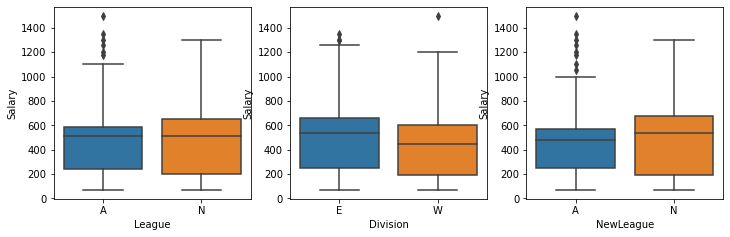

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
q = 1
import seaborn as sb
for i in cat:
    plt.subplot(3,3,q)
    sb.boxplot(X[i],Y["Salary"])
    q = q + 1

# no cat predictors

# preprocessing 

In [34]:
Y=A[["Salary"]]
X=A[['CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks']]


In [35]:
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [36]:
cat

[]

# no cat

In [37]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)

# Splitting

In [38]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)

# model

In [39]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

model = lm.fit(xtrain,ytrain)

# prediction

In [40]:
tr_pred = model.predict(xtrain)
ts_pred = model.predict(xtest)

# error

In [41]:
from sklearn.metrics import mean_absolute_error
tr_err = mean_absolute_error(ytrain,tr_pred)
ts_err = mean_absolute_error(ytest,ts_pred)

In [42]:
tr_err

193.97321132281715

In [43]:
ts_err

194.4552238676172

In [44]:
X.corr()

,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks
CAtBat,1.000000,0.995540,0.790918,0.981451,0.952450,0.894705
CHits,0.995540,1.000000,0.784515,0.983340,0.952326,0.877960
CHmRun,0.790918,0.784515,1.000000,0.820371,0.920540,0.801347
CRuns,0.981451,0.983340,0.820371,1.000000,0.947417,0.911009
CRBI,0.952450,0.952326,0.920540,0.947417,1.000000,0.884995
CWalks,0.894705,0.877960,0.801347,0.911009,0.884995,1.000000
